<a href="https://colab.research.google.com/github/kartikgill/The-GAN-Book/blob/main/Skill-03/Convergence%20Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
import tensorflow
print (tensorflow.__version__)

2.4.1


# Download and show data

11493376/11490434 [==============================] - 0s 0us/step
Training data shapes: X=(60000, 28, 28), y=(60000,)
Testing data shapes: X=(10000, 28, 28), y=(10000,)


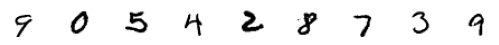

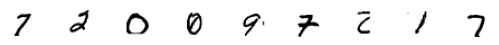

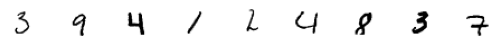

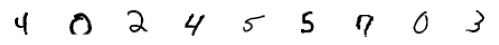

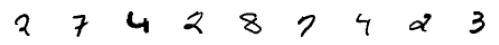

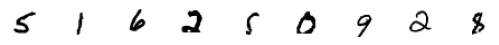

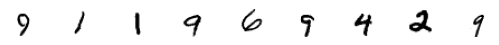

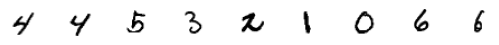

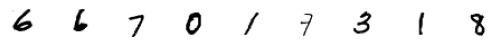

In [3]:
from tensorflow.keras.datasets import mnist

(trainX, trainY), (testX, testY) = mnist.load_data()

print('Training data shapes: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Testing data shapes: X=%s, y=%s' % (testX.shape, testY.shape))

for k in range(9):
    plt.figure(figsize=(9, 6))
    for j in range(9):
        i = np.random.randint(0, 10000)
        plt.subplot(990 + 1 + j)
        plt.imshow(trainX[i], cmap='gray_r')
        #plt.title(trainY[i])
        plt.axis('off')
    plt.show()

# Data Normalization

In [4]:
trainX = [image/255.0 for image in trainX]
testX = [image/255.0 for image in testX]

trainX = np.reshape(trainX, (60000, 28, 28, 1))
testX = np.reshape(testX, (10000, 28, 28, 1))

print (trainX.shape, testX.shape, trainY.shape, testY.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


# Define Generator Model

In [5]:
random_input = tensorflow.keras.layers.Input(shape = 50)

x = tensorflow.keras.layers.Dense(28*28, activation='relu')(random_input)
x = tensorflow.keras.layers.Reshape((28, 28, 1))(x)

generated_image = tensorflow.keras.layers.Activation('sigmoid')(x)

generator_network = tensorflow.keras.models.Model(inputs=random_input, outputs=generated_image)
generator_network.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense (Dense)                (None, 784)               39984     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
activation (Activation)      (None, 28, 28, 1)         0         
Total params: 39,984
Trainable params: 39,984
Non-trainable params: 0
_________________________________________________________________


# Define Discriminator

In [6]:
image_input = tensorflow.keras.layers.Input(shape=(28, 28, 1))

x = tensorflow.keras.layers.Flatten()(image_input)
x = tensorflow.keras.layers.Dense(512, activation='relu')(x)
x = tensorflow.keras.layers.Dense(256, activation='relu')(x)
x = tensorflow.keras.layers.Dense(128, activation='relu')(x)
x = tensorflow.keras.layers.Dense(1)(x)

real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = tensorflow.keras.models.Model(inputs=image_input, outputs=real_vs_fake_output)
discriminator_network.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0   

In [7]:
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)
discriminator_network.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# Define combined model: GAN

In [8]:
discriminator_network.trainable=False

g_output = generator_network(random_input)
d_output = discriminator_network(g_output)

gan_model = tensorflow.keras.models.Model(random_input, d_output)
gan_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
model (Functional)           (None, 28, 28, 1)         39984     
_________________________________________________________________
model_1 (Functional)         (None, 1)                 566273    
Total params: 606,257
Trainable params: 39,984
Non-trainable params: 566,273
_________________________________________________________________


# Compiling Models

In [9]:
gan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer)

# Define Data Generators

In [10]:
# Indices of Zero Images
#indices = list(np.where(trainY==0)[0])
indices = [i for i in range(60000)]

def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size) 
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = trainX[np.array(random_indices),:]
    return real_images

def show_generator_results(generator_network):
    fake_samples = get_fake_samples(generator_network, 81, noise_size)

    counter = 0
    for k in range(9):
        plt.figure(figsize=(9, 6))
        for j in range(9):
            plt.subplot(990 + 1 + j)
            plt.imshow(fake_samples[counter, :, :, 0], cmap='gray_r')
            counter += 1
            plt.axis('off')
        plt.show()
    return

# Training GAN

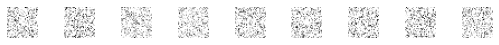

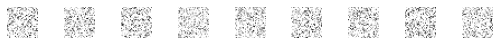

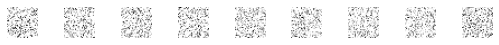

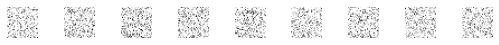

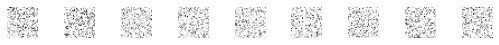

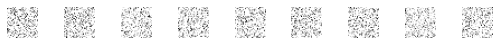

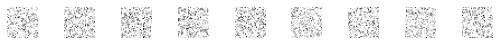

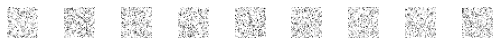

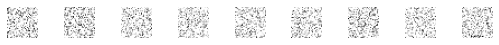

Epoch:0, Step:0, D-Loss:0.669, D-Acc:70.000, G-Loss:0.891
Epoch:0, Step:50, D-Loss:0.008, D-Acc:100.000, G-Loss:5.825
Epoch:0, Step:100, D-Loss:0.001, D-Acc:100.000, G-Loss:7.381
Epoch:0, Step:150, D-Loss:0.001, D-Acc:100.000, G-Loss:8.149
Epoch:0, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:8.813
Epoch:0, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:9.280
Epoch:0, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:9.628
Epoch:0, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:9.961
Epoch:0, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:10.219
Epoch:0, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:10.461
Epoch:1, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:10.639
Epoch:1, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:10.903
Epoch:1, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:11.117
Epoch:1, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:11.290
Epoch:1, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:11.515
Epoch:1, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:11.688
Epoch:1, Step:300, D-Lo

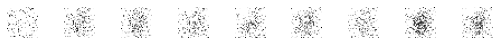

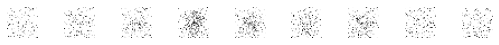

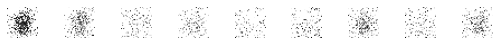

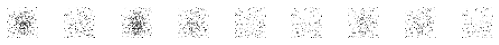

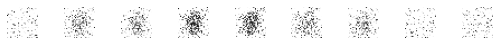

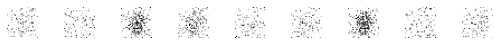

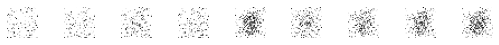

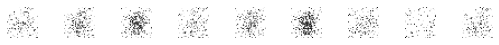

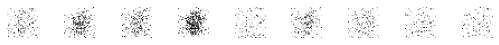

Epoch:5, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:15.568
Epoch:5, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:15.433
Epoch:5, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:15.606
Epoch:5, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:15.760
Epoch:5, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:15.852
Epoch:5, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:15.927
Epoch:5, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:15.775
Epoch:5, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:15.809
Epoch:5, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:16.037
Epoch:5, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:16.247
Epoch:6, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:16.210
Epoch:6, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:16.244
Epoch:6, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:16.122
Epoch:6, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:16.237
Epoch:6, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:16.403
Epoch:6, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:16.401
Epoch:6, Step:

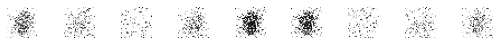

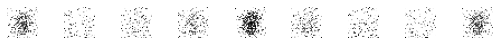

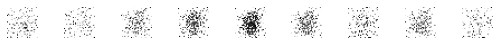

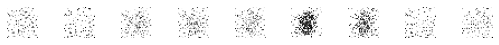

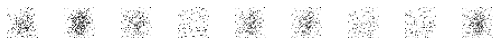

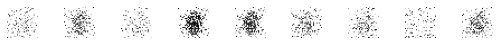

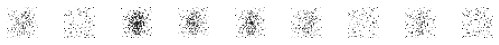

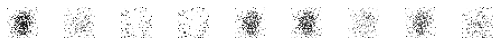

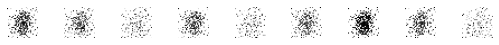

Epoch:10, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:17.887
Epoch:10, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:17.999
Epoch:10, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:18.102
Epoch:10, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:18.118
Epoch:10, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:18.025
Epoch:10, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:17.980
Epoch:10, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:18.152
Epoch:10, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:18.352
Epoch:10, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:18.130
Epoch:10, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:18.359
Epoch:11, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:18.326
Epoch:11, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:17.972
Epoch:11, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:18.437
Epoch:11, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:18.313
Epoch:11, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:18.442
Epoch:11, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:18.30

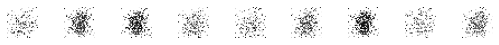

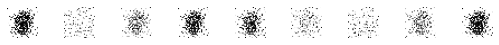

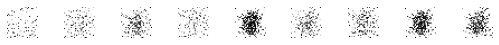

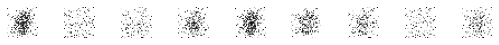

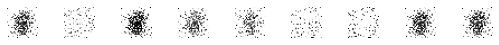

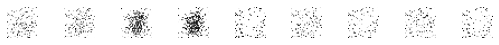

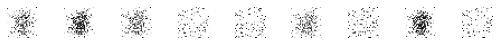

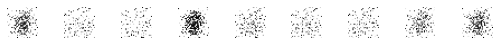

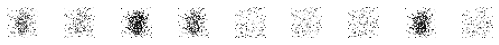

Epoch:15, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:19.463
Epoch:15, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:19.415
Epoch:15, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:19.359
Epoch:15, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:19.433
Epoch:15, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:19.511
Epoch:15, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:19.508
Epoch:15, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:19.297
Epoch:15, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:19.623
Epoch:15, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:19.688
Epoch:15, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:19.711
Epoch:16, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:19.542
Epoch:16, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:19.627
Epoch:16, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:19.621
Epoch:16, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:19.590
Epoch:16, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:19.740
Epoch:16, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:19.66

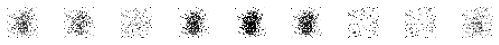

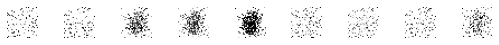

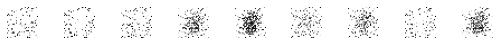

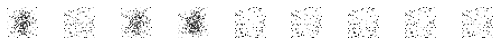

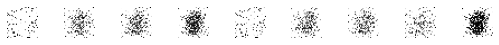

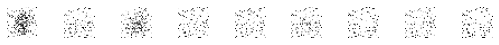

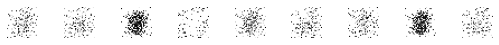

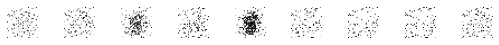

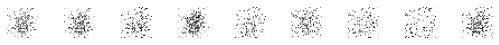

Epoch:20, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:20.404
Epoch:20, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:20.519
Epoch:20, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:20.355
Epoch:20, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:20.424
Epoch:20, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:20.365
Epoch:20, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:20.435
Epoch:20, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:20.488
Epoch:20, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:20.552
Epoch:20, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:20.633
Epoch:20, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:20.573
Epoch:21, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:20.741
Epoch:21, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:20.844
Epoch:21, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:20.697
Epoch:21, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:20.791
Epoch:21, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:20.737
Epoch:21, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:20.78

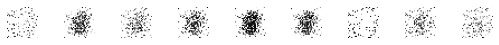

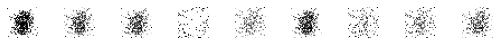

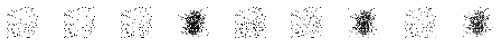

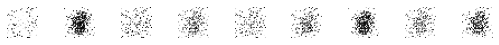

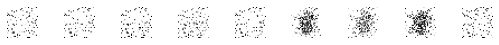

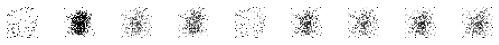

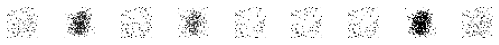

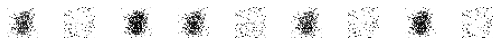

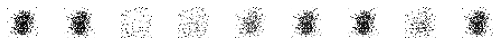

Epoch:25, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:21.247
Epoch:25, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:21.316
Epoch:25, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:21.301
Epoch:25, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:21.307
Epoch:25, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:21.401
Epoch:25, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:21.498
Epoch:25, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:21.563
Epoch:25, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:21.503
Epoch:25, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:21.397
Epoch:25, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:21.504
Epoch:26, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:21.621
Epoch:26, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:21.584
Epoch:26, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:21.592
Epoch:26, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:21.635
Epoch:26, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:21.376
Epoch:26, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:21.60

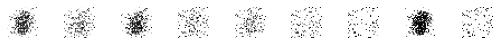

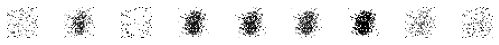

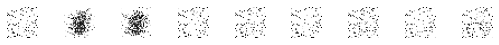

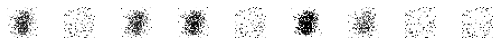

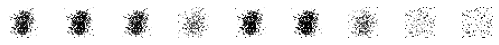

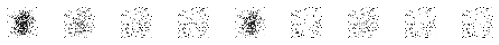

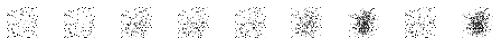

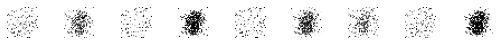

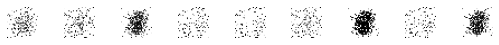

Epoch:30, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:21.998
Epoch:30, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:22.049
Epoch:30, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:22.213
Epoch:30, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:22.230
Epoch:30, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:22.329
Epoch:30, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:22.006
Epoch:30, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:22.006
Epoch:30, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:22.164
Epoch:30, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:22.180
Epoch:30, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:22.232
Epoch:31, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:22.357
Epoch:31, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:22.424
Epoch:31, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:22.278
Epoch:31, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:22.125
Epoch:31, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:22.287
Epoch:31, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:22.29

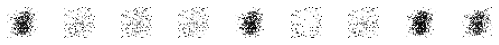

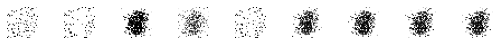

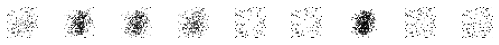

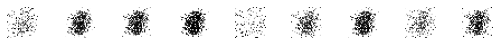

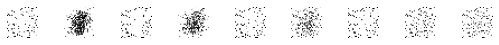

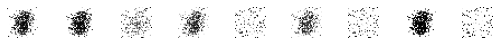

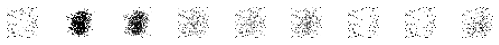

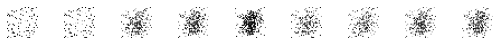

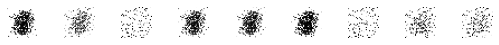

Epoch:35, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:22.766
Epoch:35, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:22.839
Epoch:35, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:22.587
Epoch:35, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:22.506
Epoch:35, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:22.631
Epoch:35, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:22.783
Epoch:35, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:22.838
Epoch:35, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:22.796
Epoch:35, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:22.890
Epoch:35, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:22.845
Epoch:36, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:22.904
Epoch:36, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:22.826
Epoch:36, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.080
Epoch:36, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:22.898
Epoch:36, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:22.814
Epoch:36, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:22.82

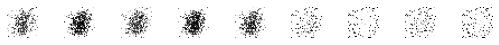

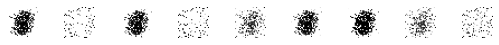

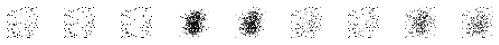

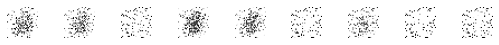

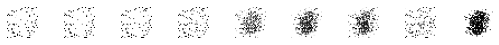

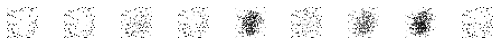

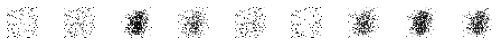

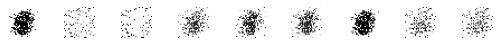

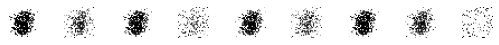

Epoch:40, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:22.973
Epoch:40, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.315
Epoch:40, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.123
Epoch:40, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.260
Epoch:40, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:23.278
Epoch:40, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.160
Epoch:40, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:23.191
Epoch:40, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:23.368
Epoch:40, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:23.117
Epoch:40, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:23.097
Epoch:41, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.297
Epoch:41, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.394
Epoch:41, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.109
Epoch:41, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.416
Epoch:41, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:23.226
Epoch:41, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.27

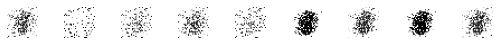

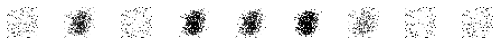

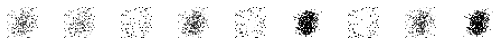

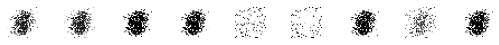

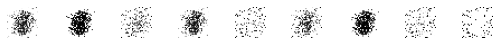

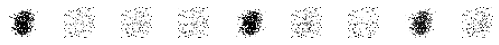

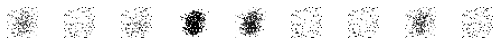

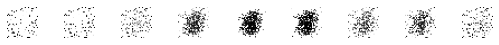

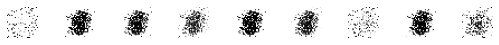

Epoch:45, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.465
Epoch:45, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.436
Epoch:45, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.470
Epoch:45, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.631
Epoch:45, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:23.437
Epoch:45, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.581
Epoch:45, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:23.599
Epoch:45, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:23.381
Epoch:45, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:23.434
Epoch:45, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:23.528
Epoch:46, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.465
Epoch:46, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.449
Epoch:46, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.680
Epoch:46, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.509
Epoch:46, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:23.413
Epoch:46, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.43

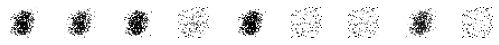

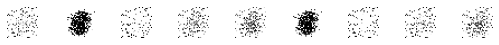

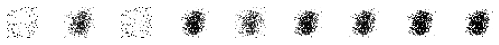

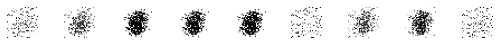

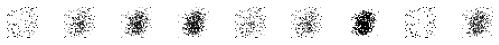

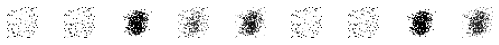

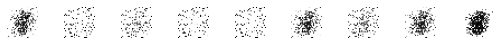

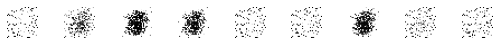

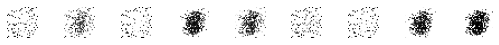

Epoch:50, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.810
Epoch:50, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.709
Epoch:50, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.935
Epoch:50, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.981
Epoch:50, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:23.817
Epoch:50, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.739
Epoch:50, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:23.857
Epoch:50, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:23.770
Epoch:50, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:23.770
Epoch:50, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:23.852
Epoch:51, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.860
Epoch:51, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.846
Epoch:51, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.719
Epoch:51, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.475
Epoch:51, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:23.730
Epoch:51, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.87

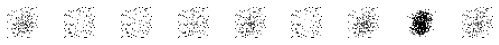

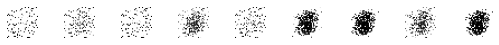

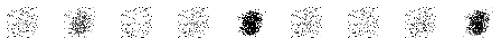

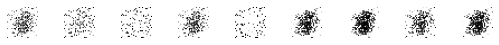

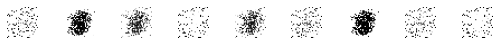

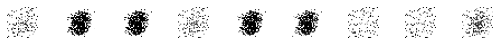

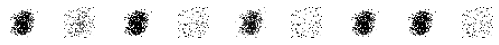

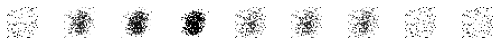

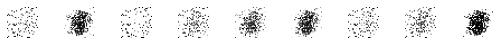

Epoch:55, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.861
Epoch:55, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.112
Epoch:55, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.943
Epoch:55, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.929
Epoch:55, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:23.792
Epoch:55, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.922
Epoch:55, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:24.029
Epoch:55, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:23.860
Epoch:55, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:24.052
Epoch:55, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:24.082
Epoch:56, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.864
Epoch:56, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.074
Epoch:56, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.726
Epoch:56, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.876
Epoch:56, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.058
Epoch:56, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.09

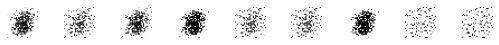

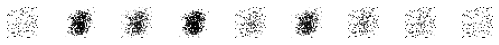

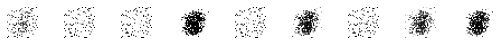

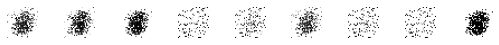

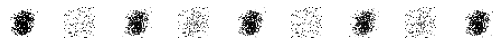

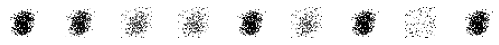

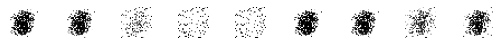

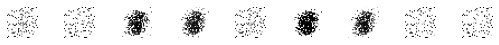

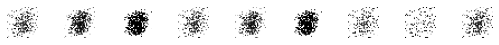

Epoch:60, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.965
Epoch:60, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.956
Epoch:60, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.164
Epoch:60, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.010
Epoch:60, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.209
Epoch:60, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.941
Epoch:60, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:23.998
Epoch:60, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:24.157
Epoch:60, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:23.955
Epoch:60, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:24.127
Epoch:61, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.975
Epoch:61, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.002
Epoch:61, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.017
Epoch:61, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.051
Epoch:61, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.105
Epoch:61, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.14

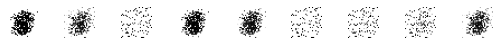

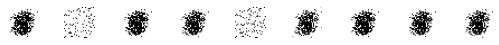

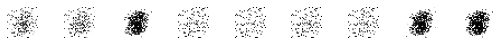

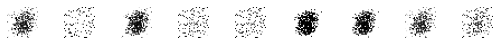

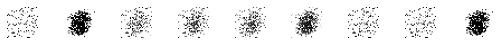

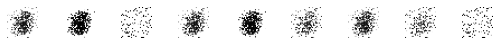

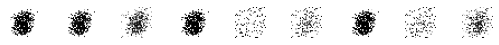

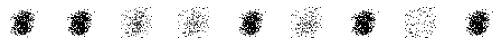

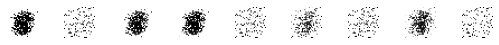

Epoch:65, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.166
Epoch:65, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.378
Epoch:65, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.982
Epoch:65, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.238
Epoch:65, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.225
Epoch:65, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.125
Epoch:65, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:24.146
Epoch:65, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:24.277
Epoch:65, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:24.182
Epoch:65, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:24.136
Epoch:66, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.284
Epoch:66, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.229
Epoch:66, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.207
Epoch:66, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.979
Epoch:66, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.072
Epoch:66, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.12

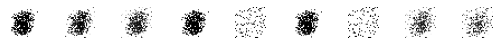

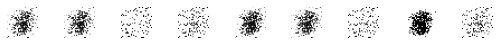

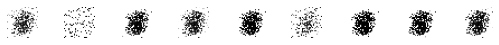

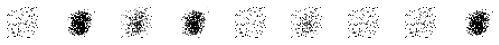

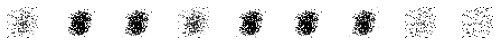

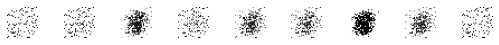

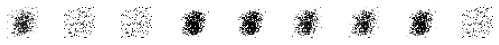

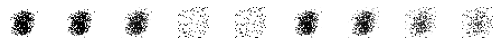

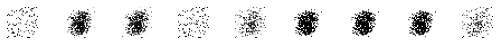

Epoch:70, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.349
Epoch:70, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.398
Epoch:70, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.256
Epoch:70, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.264
Epoch:70, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.217
Epoch:70, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.372
Epoch:70, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:24.409
Epoch:70, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:24.138
Epoch:70, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:24.178
Epoch:70, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:24.399
Epoch:71, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.986
Epoch:71, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.086
Epoch:71, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.376
Epoch:71, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.435
Epoch:71, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.324
Epoch:71, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.31

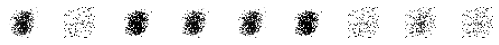

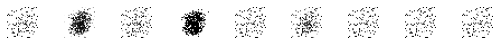

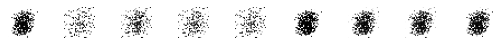

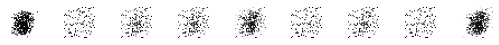

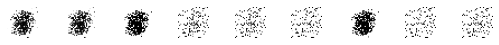

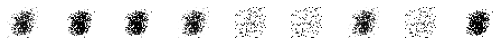

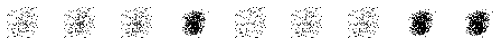

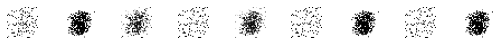

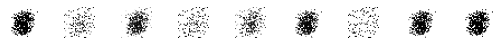

Epoch:75, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.518
Epoch:75, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.235
Epoch:75, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.229
Epoch:75, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.328
Epoch:75, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.541
Epoch:75, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.466
Epoch:75, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:24.418
Epoch:75, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:24.390
Epoch:75, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:24.523
Epoch:75, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:24.405
Epoch:76, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.306
Epoch:76, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.434
Epoch:76, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.493
Epoch:76, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.181
Epoch:76, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.217
Epoch:76, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.24

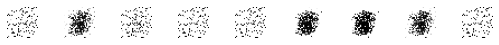

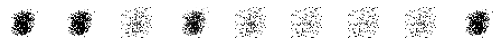

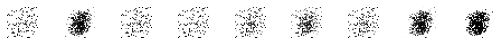

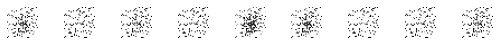

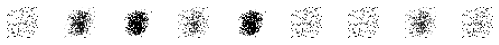

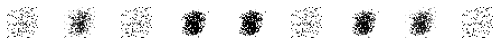

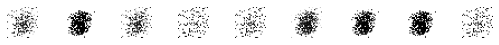

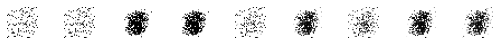

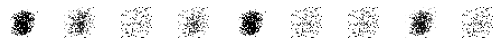

Epoch:80, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:24.546
Epoch:80, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:24.241
Epoch:80, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:24.564
Epoch:80, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:24.542
Epoch:80, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:24.434
Epoch:80, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:24.539
Epoch:80, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:24.581
Epoch:80, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:24.444
Epoch:80, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:24.556


KeyboardInterrupt: ignored

In [11]:
epochs = 500
batch_size = 60
steps = 500
noise_size = 50

losses_d = []
losses_g = []

for i in range(0, epochs):
    if (i%5 == 0):
        show_generator_results(generator_network)
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))
        
        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))
        
        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)
        
        gan_input = get_random_noise(batch_size, noise_size)
        
        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))
        
        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = gan_model.train_on_batch(gan_input, gan_output)
        
        losses_d.append(loss_d[0])
        losses_g.append(loss_g)
        
        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))
            

# Loss chart

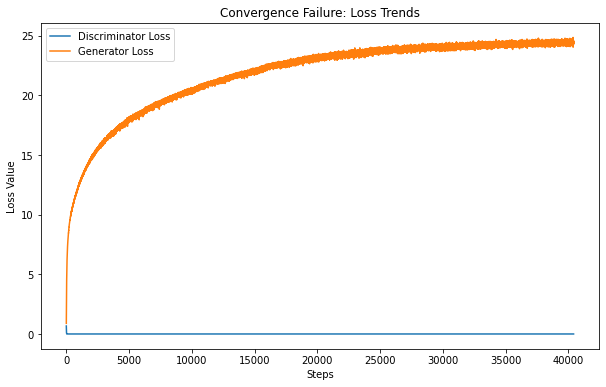

In [12]:
steps = [i for i in range(len(losses_d))]
plt.figure(figsize=(10, 6))
plt.plot(losses_d)
plt.plot(losses_g)
plt.xlabel('Steps')
plt.ylabel('Loss Value')
plt.title("Convergence Failure: Loss Trends")
plt.legend(['Discriminator Loss', 'Generator Loss'])
plt.show()